# Project - Pasta Type Image Classification

## the following pasta types will be classified:

- spaghetti
- gnocchi

In [88]:
epochs=1

### install and import libraries

In [ ]:
pip install tensorflow

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

### helper function for plotting model 

In [71]:
def plot(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

### import images

In [9]:
import pathlib
data_dir = pathlib.Path("./pasta_images_final")
image_count = len(list(data_dir.glob('*/*')))
print(f'{image_count} images were loaded')

865 images were loaded


### create training and validation dataset

In [68]:
batch_size = 32
img_height = 240
img_width = 240

train_data_set = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

validation_data_set = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_data_set.class_names
print(class_names)

num_classes = len(class_names)
print(num_classes)

Found 865 files belonging to 2 classes.
Using 606 files for training.
Found 865 files belonging to 2 classes.
Using 259 files for validation.
['gnocchi', 'spaghetti']
2


### check dataset

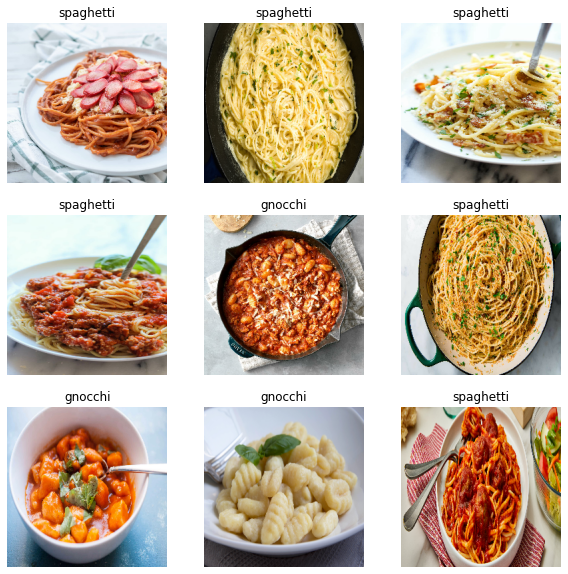

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_data_set.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [69]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_data_set = train_data_set.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_data_set = validation_data_set.cache().prefetch(buffer_size=AUTOTUNE)

## create first model

- we added some preprocessing layers to generate more data
    - randomflip
    - randomrotation
    - randomzoom
    

In [89]:
model = Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
  layers.experimental.preprocessing.RandomRotation(0.1),
  layers.experimental.preprocessing.RandomZoom(0.1),
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
            loss=keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_flip_19 (RandomFlip)  (None, 240, 240, 3)       0         
_________________________________________________________________
random_rotation_19 (RandomRo (None, 240, 240, 3)       0         
_________________________________________________________________
random_zoom_19 (RandomZoom)  (None, 240, 240, 3)       0         
_________________________________________________________________
rescaling_19 (Rescaling)     (None, 240, 240, 3)       0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 240, 240, 16)      448       
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 120, 120, 16)      0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 120, 120, 32)    

### train model

In [90]:
history = model.fit(
  train_data_set,
  validation_data=validation_data_set,
  epochs=epochs
)

19/19 [==============================] - 59s 3s/step - loss: 7.4985 - accuracy: 0.4835 - val_loss: 7.6731 - val_accuracy: 0.4479


### plot model

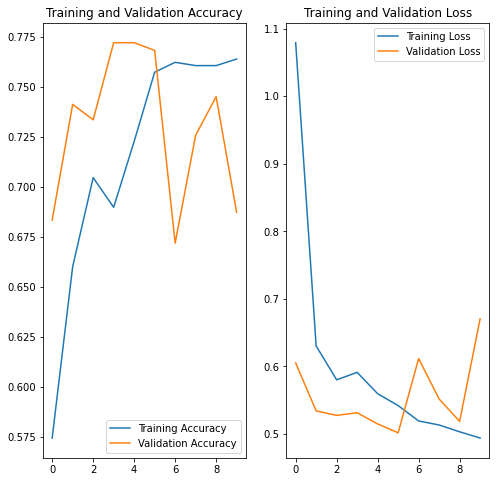

In [14]:
plot(history)

## Conclusion

- the overall result is good with a validation accuracy of around 0.7
- on epoch 5 it seems that the model starts to overfit the data

## Next steps

to stop overfitting we try to use a dropout of 10 % in our next model

In [85]:
model = Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
  layers.experimental.preprocessing.RandomRotation(0.1),
  layers.experimental.preprocessing.RandomZoom(0.1),
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.1),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
            loss=keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

model.summary()

history1 = model.fit(
  train_data_set,
  validation_data=validation_data_set,
  epochs=epochs
)

plot(history1)

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_flip_17 (RandomFlip)  (None, 240, 240, 3)       0         
_________________________________________________________________
random_rotation_17 (RandomRo (None, 240, 240, 3)       0         
_________________________________________________________________
random_zoom_17 (RandomZoom)  (None, 240, 240, 3)       0         
_________________________________________________________________
rescaling_17 (Rescaling)     (None, 240, 240, 3)       0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 240, 240, 16)      448       
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 120, 120, 16)      0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 120, 120, 32)    

ValueError: in user code:

    /opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /opt/conda/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/conda/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/conda/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:789 run_step  **
        outputs = model.train_step(data)
    /opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:759 train_step
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    /opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/engine/compile_utils.py:409 update_state
        metric_obj.update_state(y_t, y_p, sample_weight=mask)
    /opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/utils/metrics_utils.py:90 decorated
        update_op = update_state_fn(*args, **kwargs)
    /opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/metrics.py:176 update_state_fn
        return ag_update_state(*args, **kwargs)
    /opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/metrics.py:2069 update_state  **
        return metrics_utils.update_confusion_matrix_variables(
    /opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/utils/metrics_utils.py:353 update_confusion_matrix_variables
        y_pred.shape.assert_is_compatible_with(y_true.shape)
    /opt/conda/lib/python3.8/site-packages/tensorflow/python/framework/tensor_shape.py:1134 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 2) and (None, 1) are incompatible


## conclusion

- validation accuracy is increasing and the valdation loss is decreasing.
- as the validation loss stayed the same since epoch 5, we don't need more epochs to train the model

## predict new data

In [31]:
def predict(pathToFile): 
    img = keras.preprocessing.image.load_img(
    pathToFile, target_size=(img_height, img_width)
    )
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    print(
        "This image most likely belongs to {} with a {:.2f} percent confidence."
        .format(class_names[np.argmax(score)], 100 * np.max(score))
    )

In [32]:
predict("./pasta_images_test/spaghetti_test.jpg")

This image most likely belongs to spaghetti with a 58.33 percent confidence.


In [34]:
predict("./pasta_images_test/gnocchi_test.jpg")

This image most likely belongs to gnocchi with a 82.85 percent confidence.


## create test data set 

In [2]:
testdata_dir = pathlib.Path("./pasta_images_test")
image_count = len(list(testdata_dir.glob('*')))
print(f'{image_count} images were loaded')

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
  testdata_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

preds = model.predict(test_dataset)

print(preds)

NameError: name 'pathlib' is not defined

In [1]:
preds = preds.flatten()

NameError: name 'preds' is not defined

In [ ]:
fpr, tpr, _ = roc_curve(validation_generator.classes, preds)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()